In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import plotting

#plotly 
import plotly.offline as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix,classification_report,precision_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf


plt.style.use('fivethirtyeight')

In [3]:
df=pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df=df.drop('Unnamed: 32', axis=1)


In [5]:
diagnosis={'M':1, 'B':0}
df['diagnosis']=[diagnosis[x] for x in df['diagnosis']]

In [6]:
col=['radius_mean', 'texture_mean', 'perimeter_mean',
        'smoothness_mean', 
        'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se',
        'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
        'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [7]:
X=df.drop(col, axis=1)
y=df['diagnosis']
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

# Build the AdaBoost model 

In [8]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [9]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = model1.predict(X_train)

In [10]:
y_pred=model1.predict(X_train)


In [11]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 1.0
F1 Score:- 1.0
Average Precision Score:- 1.0
Log Loss:- 9.992007221626413e-16
Precision Score:- 1.0
Recall Score:- 1.0
ROC-AUC Score:- 1.0


In [12]:
y_test_pred=model1.predict(x_test)


In [13]:
ada_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",ada_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 1.0
F1 Score:- 1.0
Average Precision Score:- 1.0
Log Loss:- 9.992007221626413e-16
Precision Score:- 1.0
Recall Score:- 1.0
ROC-AUC Score:- 1.0


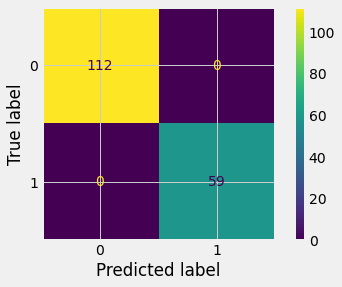

In [14]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=model1.classes_)
disp.plot()

In [15]:
from sklearn.model_selection import cross_val_score    
scores = cross_val_score(model1, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print("-------------------")
print(scores.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------
1.0


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        59

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [17]:
y_test_pred_prob=model1.predict_proba(x_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve
metrics.roc_auc_score(y_test, y_test_pred_prob)

1.0

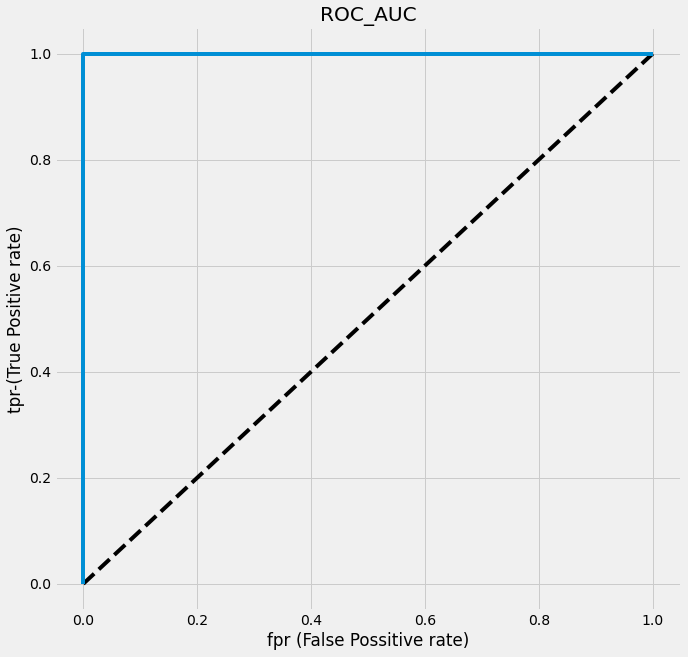

In [18]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

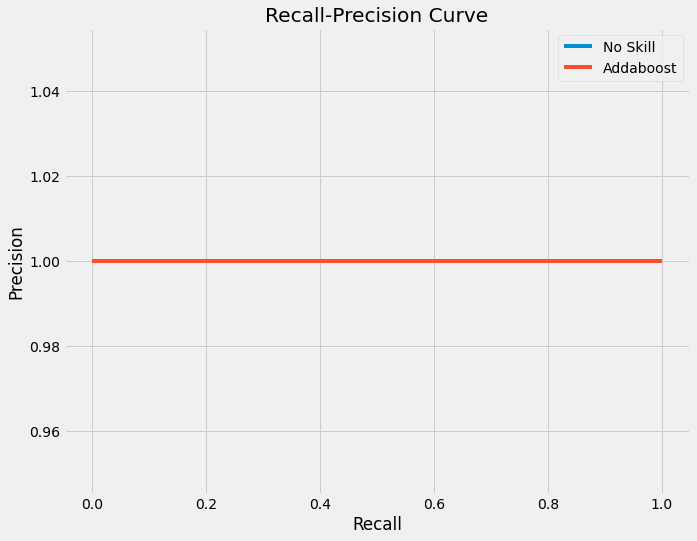

In [19]:
from sklearn.metrics import precision_recall_curve
no_skill=len(y==1)/len(y)
y_test_prob=model1.predict_proba(x_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="Addaboost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

# XGBoost

In [20]:
from sklearn.ensemble import GradientBoostingClassifier


In [21]:
model1=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

In [22]:
model1.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1)

In [23]:
y_pred=model1.predict(X_train)


In [24]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 1.0
F1 Score:- 1.0
Average Precision Score:- 1.0
Log Loss:- 9.992007221626413e-16
Precision Score:- 1.0
Recall Score:- 1.0
ROC-AUC Score:- 1.0


In [25]:
y_test_pred=model1.predict(x_test)


In [26]:
xgb_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",xgb_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 1.0
F1 Score:- 1.0
Average Precision Score:- 1.0
Log Loss:- 9.992007221626413e-16
Precision Score:- 1.0
Recall Score:- 1.0
ROC-AUC Score:- 1.0


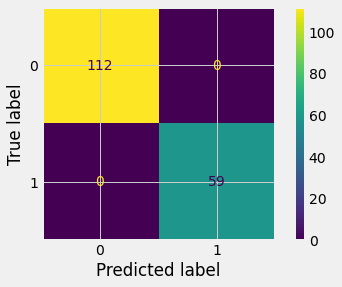

In [27]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=model1.classes_)
disp.plot()

In [28]:
from sklearn.model_selection import cross_val_score    
scores = cross_val_score(model1, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print("-------------------")
print(scores.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------
1.0


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        59

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [30]:
y_test_pred_prob=model1.predict_proba(x_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve
metrics.roc_auc_score(y_test, y_test_pred_prob)

1.0

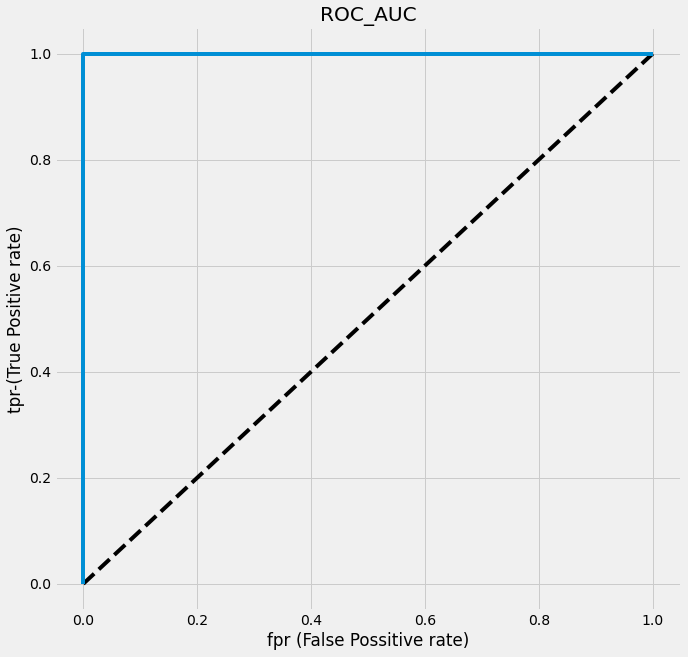

In [31]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='XGBoost')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

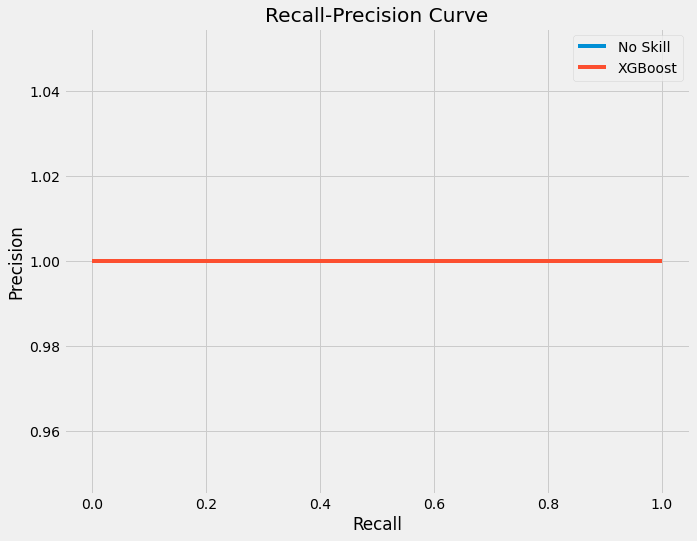

In [32]:
from sklearn.metrics import precision_recall_curve
no_skill=len(y==1)/len(y)
y_test_prob=model1.predict_proba(x_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="XGBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

# Cross Validation 

In [33]:
# split training feature and target sets into training and validation subsets
from sklearn.model_selection import train_test_split

X_train_sub, X_validation_sub, y_train_sub, y_validation_sub = train_test_split(X_train, y_train, random_state=0)

In [34]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train_sub, y_train_sub)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_sub, y_train_sub)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation_sub, y_validation_sub)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.990
Accuracy score (validation): 1.000

Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 1.000

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 1.000



In [35]:
# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train_sub, y_train_sub)
predictions = gb.predict(X_validation_sub)

print("Confusion Matrix:")
print(confusion_matrix(y_validation_sub, predictions))
print()
print("Classification Report")
print(classification_report(y_validation_sub, predictions))

Confusion Matrix:
[[57  0]
 [ 0 43]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        43

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



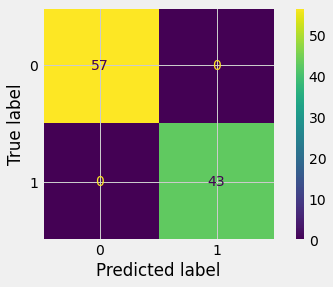

In [36]:
cfm=confusion_matrix(y_validation_sub, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=gb.classes_)
disp.plot()

# CatBoost Classifier in Python


In [37]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)

In [38]:
clf.fit(X_train, y_train, 
        eval_set=(X_validation_sub, y_validation_sub), 
        verbose=False
)

In [39]:
y_pred=clf.predict(X_train)


In [40]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 1.0
F1 Score:- 1.0
Average Precision Score:- 1.0
Log Loss:- 9.992007221626413e-16
Precision Score:- 1.0
Recall Score:- 1.0
ROC-AUC Score:- 1.0


In [41]:
y_test_pred=clf.predict(x_test)


In [42]:
cat_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",cat_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 1.0
F1 Score:- 1.0
Average Precision Score:- 1.0
Log Loss:- 9.992007221626413e-16
Precision Score:- 1.0
Recall Score:- 1.0
ROC-AUC Score:- 1.0


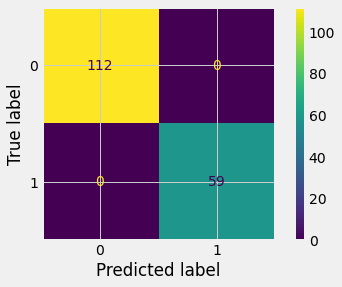

In [43]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=clf.classes_)
disp.plot()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        59

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [45]:
y_test_pred_prob=clf.predict_proba(x_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve
metrics.roc_auc_score(y_test, y_test_pred_prob)

1.0

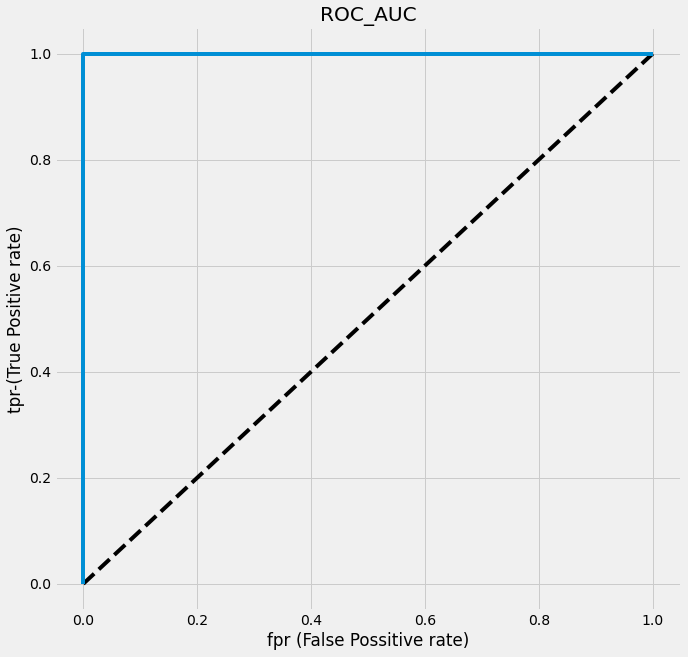

In [46]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

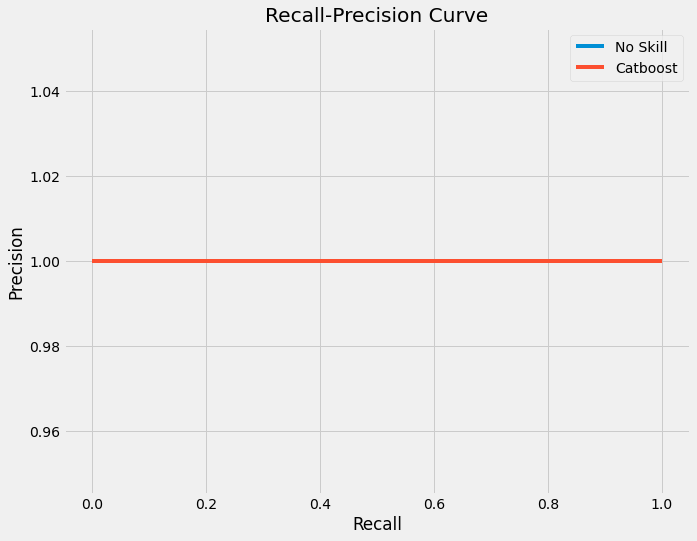

In [47]:
from sklearn.metrics import precision_recall_curve
no_skill=len(y==1)/len(y)
y_test_prob=clf.predict_proba(x_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="Catboost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()